### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

## Submission by Kingshuk Banerjee

#### 1. Import the necessary packages - 2.5 marks

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
ratings = pd.read_csv('Data.csv')
movies = pd.read_csv('item.csv')
users = pd.read_csv('user.csv')

In [4]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
movies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [7]:
df_names = ["users", "ratings", "movies"]
i = 0
for x in [users, ratings, movies]:
    print(df_names[i])
    print("Info for dataframe %s" % (df_names[i]))
    print("-------------------------")
    print(x.info)
    print("Describing dataframe %s" % (df_names[i]))
    print("-------------------------")
    print(x.describe())
    print("Shape of dataframe %s" % (df_names[i]))
    print("-------------------------")
    print(x.shape)
    print("-------------------------")
    print("No. missing values in dataframe %s is %d" % (df_names[i], x.isnull().sum().sum()))
    i = i + 1

users
Info for dataframe users
-------------------------
<bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>
Describing dataframe users
-------------------------
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max  

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [8]:
# use sum on the default axis
movies.loc[:,'unknown':'Western'].sum(axis=0, skipna = True)

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 5 marks

In [9]:
#hint: use sum on the axis = 1
movies[movies.loc[:, 'Action':'Western'].sum(axis=1) >1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [10]:
movies.drop(movies[movies.unknown == 1].index, inplace=True)
movies[movies.unknown > 0]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [3]:
# HINT: Use distplot for age and countplot for gender,ratings,occupation. Use lineplot or countplot for release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

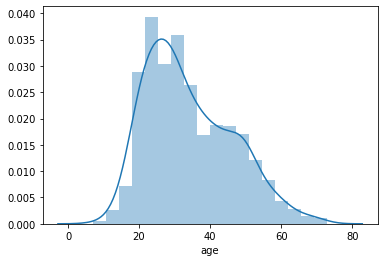

In [22]:
#your answers here
sns.distplot(users['age'])

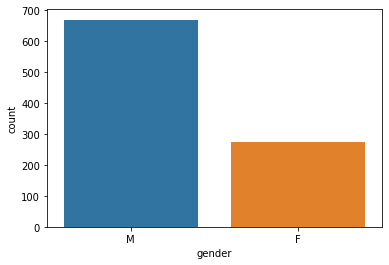

In [23]:
sns.countplot(users['gender'])

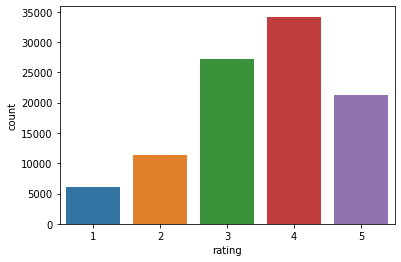

In [13]:
sns.countplot(ratings['rating'])

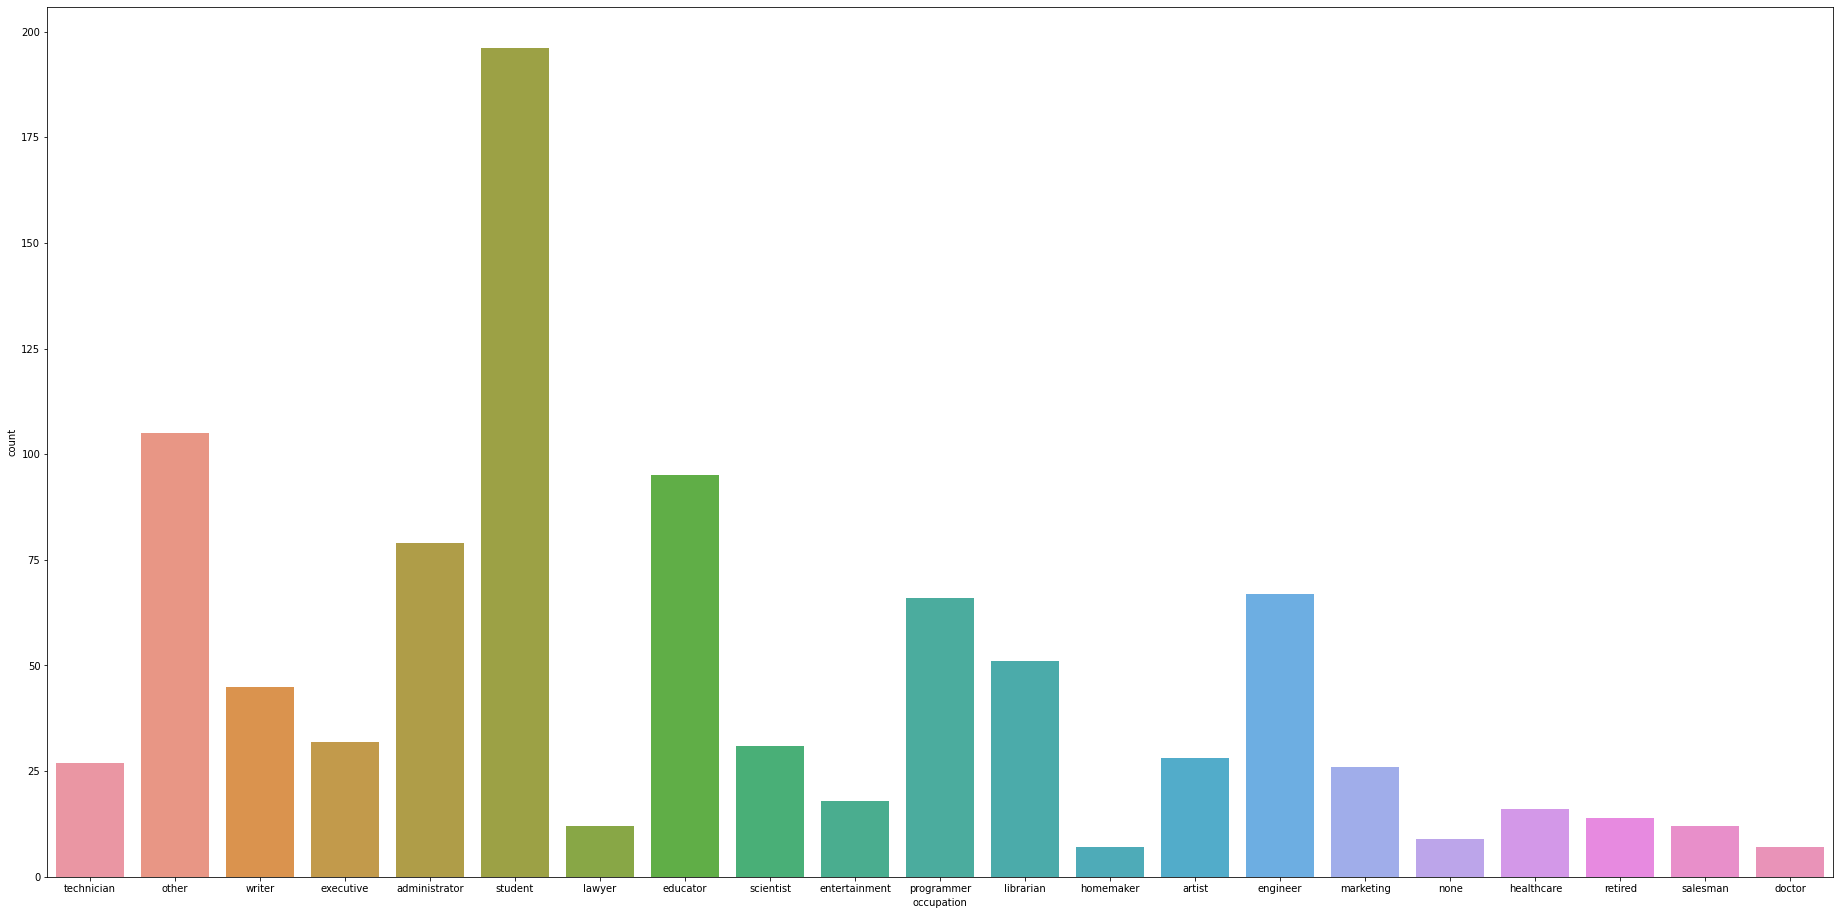

In [14]:
plt.figure(figsize=(32, 16))
sns.countplot(users['occupation'])

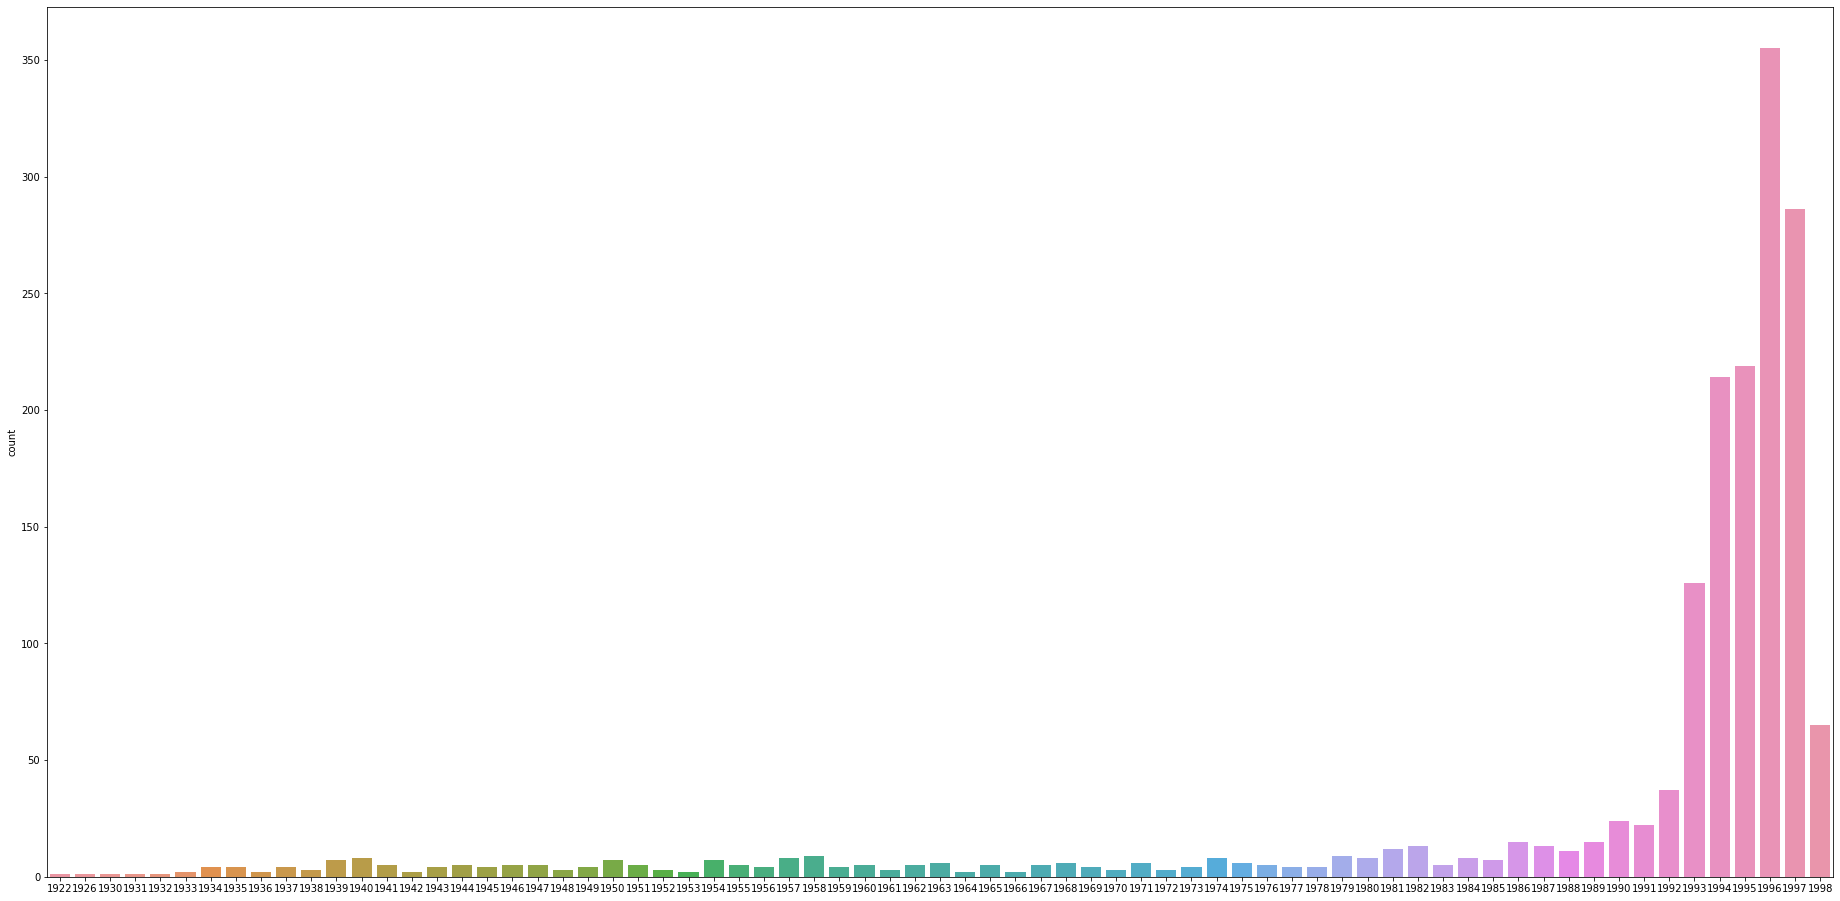

In [15]:
ryears = movies['release date']
v = ryears.values.astype(str)
arr = [x[7:] for x in v]
plt.figure(figsize=(32, 16))
sns.countplot(arr)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

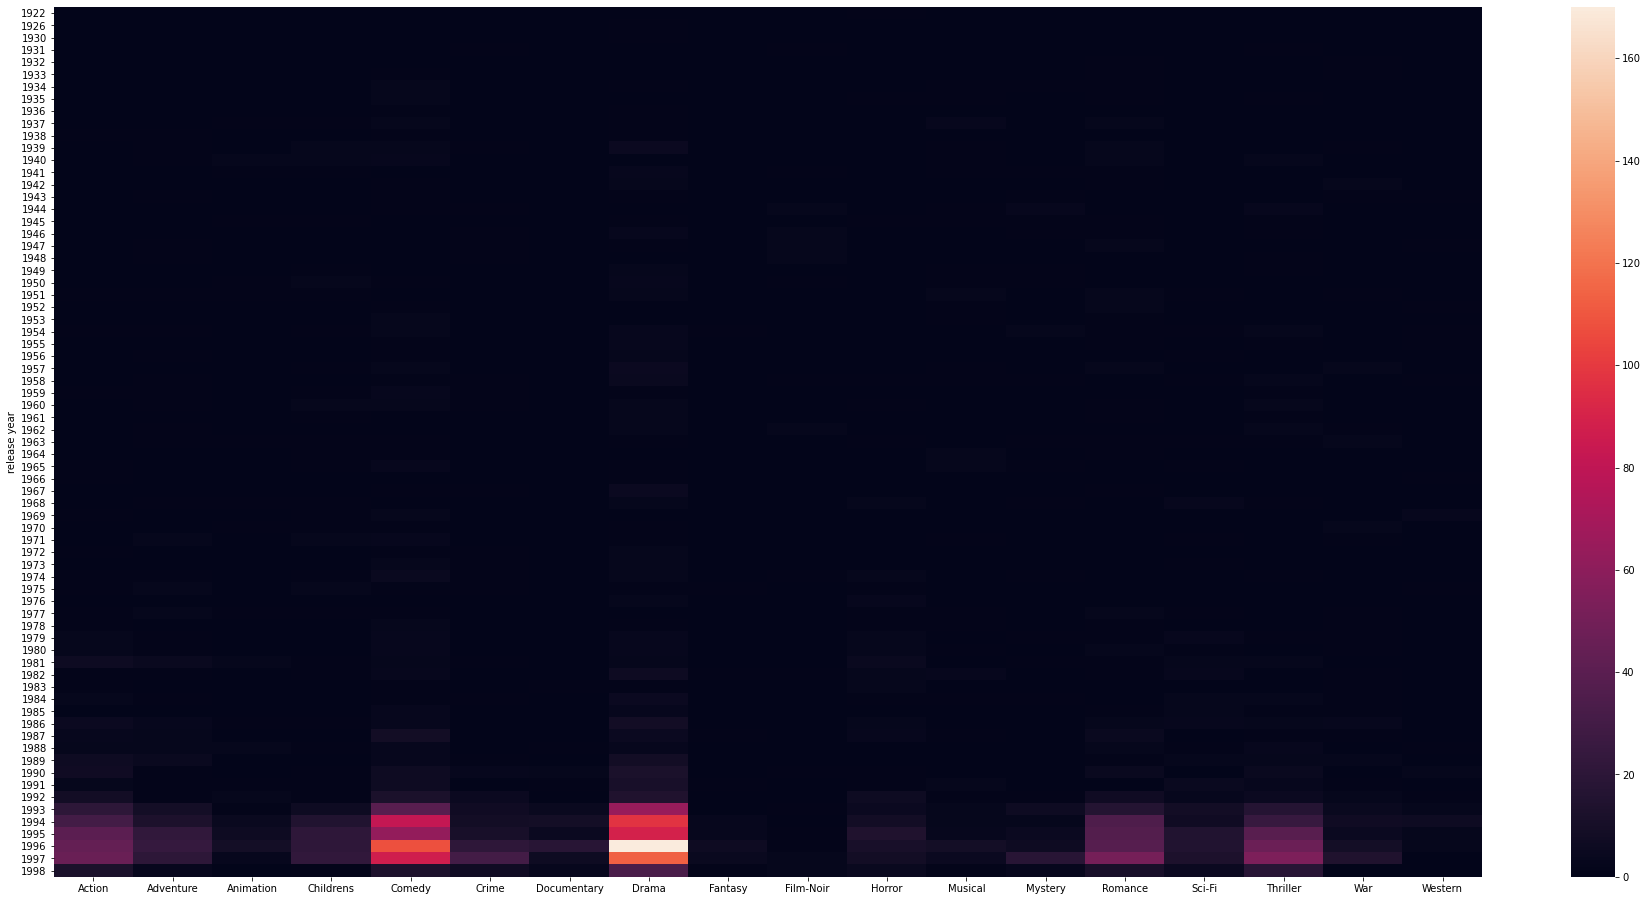

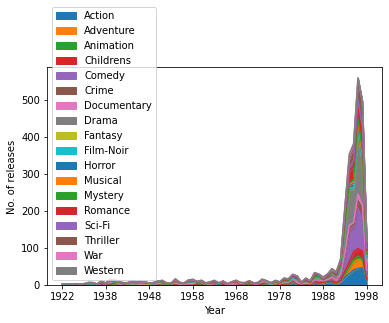

In [24]:
#Your answer here
popularity = movies.copy()
ryears = movies['release date']
v = ryears.values.astype(str)
arr = [x[7:] for x in v]
popularity['release year'] = arr
popularity.set_index('release year')
newdf = popularity.groupby('release year').sum()
newdf.drop(['movie id', 'unknown'], axis=1, inplace=True)
newdf
plt.figure(figsize=(32, 16))
sns.heatmap(newdf)
newdf.plot.area()
plt.xlabel('Year')
plt.ylabel('No. of releases')
plt.show()


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. 
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.
4. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [25]:
#your answer here
# First find a list of movie ids which have more than 100 ratings
high_rated = ratings['movie id'].value_counts() > 100
# Get all movies by their average ratings
df_ratings = ratings.groupby('movie id').mean()
# Drop unnecessary columns
df_ratings.drop(['user id', 'timestamp'], axis=1, inplace=True)
# Select the ones with more than 100 ratings
df_ratings = df_ratings[high_rated]

# To select 25, we want to print the names. Get the movie ids and names only.
df_movies = movies[['movie id', 'movie title']]
df_movies.set_index('movie id', inplace=True)
# Get all movie ids and names that are high rated
df_movies = df_movies[high_rated]
# Merge the average ratings and movie names
#merged = pd.concat([df_movies, df_ratings], axis=1)
merged = pd.merge(df_movies, df_ratings, on='movie id')
# Sort by ratings and pick the top 25
merged.sort_values('rating', ascending=False, inplace=True)
top25 = merged[0:25]
top25

,movie title,rating
movie id,,
408,"Close Shave, A",4.491071
318,Schindler's List,4.466443
169,"Wrong Trousers, The",4.466102
483,Casablanca,4.456790
64,"Shawshank Redemption, The",4.445230
603,Rear Window,4.387560
12,"Usual Suspects, The",4.385768
50,Star Wars,4.358491
178,12 Angry Men,4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [26]:
m1 = pd.merge(users, ratings, on='user id')
m2 = pd.merge(m1, movies, on='movie id')
# keep only gender and genres, drop rest all
m3 = m2.drop(['user id', 'age', 'occupation', 'zip code', 'movie id', 'rating', 'timestamp', 'movie title', 'release date'], axis=1)
m4 = m3.groupby('gender').sum()
m4 = m4[['Drama', 'Sci-Fi', 'Romance']]
m4

,Drama,Sci-Fi,Romance
gender,,,
F,11008,2629,5858
M,28887,10101,13603


In [27]:
# Find the relative percentage of each genre
totals = m4.sum(axis=1)
# print(totals)
for c in ['Drama', 'Sci-Fi', 'Romance']:
    F_percent = 100.0*m4.loc['F',c]/totals[0]
    M_percent = 100.0*m4.loc['M',c]/totals[1]
    print("%.2f%% of Men and %.2f%% of Women watch %s" % (M_percent.round(2), F_percent.round(2), c))
    if (F_percent > M_percent):
        print("Women watch more %s than Men" % (c))
    else:
        print("Men watch more %s than Women" % (c))
    print("\n")

54.93% of Men and 56.47% of Women watch Drama
Women watch more Drama than Men


19.21% of Men and 13.49% of Women watch Sci-Fi
Men watch more Sci-Fi than Women


25.87% of Men and 30.05% of Women watch Romance
Women watch more Romance than Men




#### Conclusion:



#write the conclusions here
# Conclusion
- Men watch more drama than women - *False* as per above
- Women watch more Sci-Fi than men - *False* as per above
- Men watch more Romance than women - *False* as per above